<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-11/blob/main/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer modelo

## Preparación del entorno de trabajo

Lo primero que vamos a hacer es preparar el entorno de trabajo. Para ello, descargaremos e importaremos las librerías necesarias:

Instalamos las librerías necesarias:

In [ ]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 204kB 29.4MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 


Las importamos:

In [ ]:
from fastai.vision.all import *
import fastai
import os
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

Descargamos las imágenes:

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WS7kotw0iuFxMpzGkiaNVWm8SLr_uNT4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WS7kotw0iuFxMpzGkiaNVWm8SLr_uNT4" -O datos.zip && rm -rf /tmp/cookies.txt
!unzip datos.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/11932.jpg          
  inflating: data/11933.jpg          
  inflating: data/11934.jpg          
  inflating: data/11935.jpg          
  inflating: data/11936.jpg          
  inflating: data/11937.jpg          
  inflating: data/11938.jpg          
  inflating: data/11939.jpg          
  inflating: data/1194.jpg           
  inflating: data/11940.jpg          
  inflating: data/11941.jpg          
  inflating: data/11942.jpg          
  inflating: data/11943.jpg          
  inflating: data/11944.jpg          
  inflating: data/11945.jpg          
  inflating: data/11946.jpg          
  inflating: data/11947.jpg          
  inflating: data/11948.jpg          
  inflating: data/1195.jpg           
  inflating: data/11954.jpg          
  inflating: data/11958.jpg          
  inflating: data/1196.jpg           
  inflating: data/11962.jpg          
  inflating: data/11963.jpg          
  inflating: data/11964.jpg

Una vez tenemos las imágenes, debemos descargar las etiquetas. Cada etiqueta se relaciona con su imagen correspondiente por un ID (el nombre de la imagen). Estas etiquetas son necesarias para poder entrenar nuestro modelo.

In [ ]:
!wget https://www.dropbox.com/s/acezkcl7d1wfevz/LaRiojaEnLaMemoria.csv?dl=1 -O data.csv -q

Importamos los datos del CSV a un dataframe (usando pandas) para poder tratarlos.

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,ID_NUM,IDENT,TITULO,TITULAR,DESCRIPCION,PALABRAS_CLAVE,ANNO,LUGAR,LOCALIDAD,PROVINCIA,PAIS,PROVEEDOR
0,80,LRM-2008/00014-Imagen,Foto con los abuelos,Fotografía de los abuelos con la nieta de dos años en Hormilleja,NaN,NaN,1961,NaN,Hormilleja,NaN,NaN,NaN
1,81,LRM-2008/00015-Imagen,Madre e hijos en el Espolón,Madre e hijos en el Espolón,NaN,NaN,1961,NaN,Logroño,NaN,NaN,NaN
2,82,LRM-2008/00016-Imagen,SrTraspaderne,Severiano Traspaderne con su furgoneta Citroen 2CV de reparto de piensos,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN
3,83,LRM-2008/00017-Imagen,Invierno en moto,Sr Aragón y Sr García pertrechados para soportar el invierno en su motol (Rieju 125),NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN
4,84,LRM-2008/00018-Imagen,Empujando el microcoche,Empujando un BMW Isetta,NaN,NaN,1962,NaN,Logroño,NaN,NaN,NaN


## Separación en entrenamiento y test

Primero, creamos las carpetas:

In [ ]:
path = Path('data')
trainPath = Path('data/train')
testPath = Path('data/test')

(path/'train').mkdir(parents=True,exist_ok=True)
(path/'test').mkdir(parents=True,exist_ok=True)

Antes de continuar, eliminamos las imágenes que no puedan ser tratadas por la librería:

In [ ]:
#images = verify_images(get_image_files(path))
#nDeleted = len(images)

#for image in images:
#  os.remove(str(image))

#print(nDeleted)

Procedemos a separar las imágenes de forma aleatoria gracias a la función train_test_split:

In [ ]:
trainImages, testImages = train_test_split(get_image_files(path),test_size=0.2,random_state=15)

In [ ]:
for image in trainImages:
  shutil.move(str(image),path/('train/' + image.name))

for image in testImages:
  shutil.move(str(image),path/('test/' + image.name))

## Preparación del DataFrame para regresión

Una vez que hemos separado las imágenes en entrenamiento y test, vamos a crear un nuevo DataFrame en el que se relacione la ruta de la imagen con su año correspondiente de forma directa, para poder utilizarlo más adelante al crear el DataBlock.

Para cada una de las imágenes seleccionadas para entrenamiento, buscamos en el DataFrame inicial y le asignamos su año. Para ello, definimos una función que, dado el path de una imagen, nos devuelva su año asignado.



In [ ]:
def getImageYearById(id):
  try:
    return df[df['ID_NUM'] == int(id)]['ANNO'].values[0]
  except:
    return -1

In [ ]:
data = []

for image in trainImages:
  imageName = image.name
  imageYear = getImageYearById(image.stem)
  if imageYear != -1:
    data.append((imageName, int(imageYear)))
  else:
    print('No data for image ' + str(imageName))

No data for image 33714.jpg
No data for image 33708.jpg
No data for image 33715.jpg
No data for image 11840.jpg
No data for image 35616.jpg
No data for image 42585.jpg
No data for image 35401.jpg
No data for image 42583.jpg
No data for image 42887.jpg
No data for image 27907.jpg
No data for image 42581.jpg
No data for image 35416.jpg
No data for image 35615.jpg
No data for image 35651.jpg
No data for image 42562.jpg
No data for image 34506.jpg
No data for image 31839.jpg
No data for image 33700.jpg
No data for image 42463.jpg
No data for image 38159.jpg
No data for image 42575.jpg
No data for image 42568.jpg
No data for image 42561.jpg
No data for image 33727.jpg
No data for image 43264.jpg
No data for image 33716.jpg
No data for image 34259.jpg
No data for image 37570.jpg
No data for image 31048.jpg
No data for image 37832.jpg
No data for image 35404.jpg
No data for image 33702.jpg
No data for image 42564.jpg
No data for image 33725.jpg
No data for image 42569.jpg
No data for image 34

Hay algunas imágenes sin información asociada, tal y como comprobamos al construir el modelo de clasificación. 

Finalmente, generamos el DataFrame a partir de la lista y obtenemos las imágenes y sus años por separado.

In [ ]:
trainImagesDf = pd.DataFrame(data, columns=['path','year'])
trainImagesDf.astype({'year': 'int32'})
trainImagesDf.head()

,path,year
0,34873.jpg,1973
1,27049.jpg,1950
2,12090.jpg,1976
3,33090.jpg,1969
4,1041.jpg,1959


In [ ]:
X = ColReader('path', pref=trainPath)
Y = ColReader('year')

## Definición del DataBlock y el DataLoader

A continuación definiremos estos dos objetos necesarios para poder entrenar el modelo.

### DataBlock

El DataBlock es el objeto que, gracias a una serie de opciones que se especifican en su constructor, permite cargar las imágenes en el modelo mediante un DataLoader.

En esta ocasión, como vamos a hacer regresión, cambia ligeramente respecto a usos anteriores



In [ ]:
dataBlock = DataBlock(blocks=(ImageBlock, RegressionBlock()),
                      get_x = X,
                      get_y = Y,
                      splitter=RandomSplitter(),
                      item_tfms=Resize(460, method='squish'),
                      batch_tfms=[*aug_transforms(size=224, max_warp=0)])

### DataLoader

A partir del DataBlock, construimos el DataLoader. Es importante asignar un batch que sea una potencia de 2 para optimizar el uso de la GPU.

In [ ]:
dataLoader = dataBlock.dataloaders(trainImagesDf)

Mostramos una selección aleatoria de imágenes:

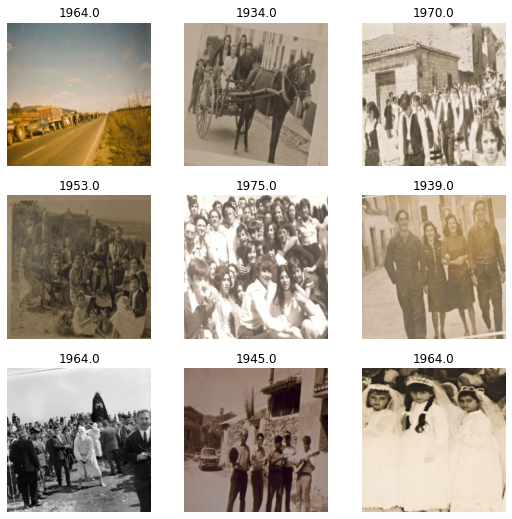

In [ ]:
dataLoader.show_batch()

## Creación del modelo

El learner también varía ligeramente. La arquitectura esta vez será resnet50, que esperemos que de mejores resultados. Por otra parte, también hay que cambiar la función de pérdida y la métrica que evluará nuestro modelo.

Finalmente, debemos especificar el rango en que se encuentra la predicción.

In [ ]:
yearRange = (df['ANNO'].min(),df['ANNO'].max())
yearRange

(1863, 1991)

In [ ]:
from fastai.metrics import mae

learn = cnn_learner(dataLoader, resnet50, loss_func=MSELossFlat(), y_range=yearRange, metrics=mae)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


### Entrenamiento de la red

Antes de entrenar el modelo, buscamos el mejor learning rate:

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.10000000149011612)

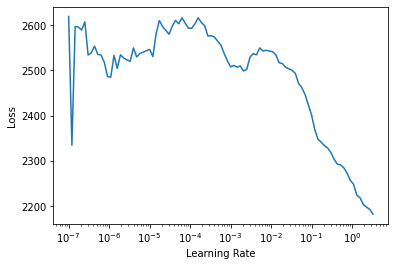

In [ ]:
learn.lr_find()

Siguiendo la metodología explicada [aquí](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html#how-do-you-find-a-good-learning-rate), 10 es un buen valor del learning rate, en una posición anterior al punto de inflexión.

Utilizamos la funcionalidad de fine tune disponible en FastAI.

In [ ]:
learn.fine_tune(10,base_lr=0.01)

epoch,train_loss,valid_loss,mae,time
0,1989.104370,766.022400,21.889299,06:29


epoch,train_loss,valid_loss,mae,time
0,543.561951,303.249023,13.349410,06:30
1,358.539368,360.380157,12.571272,06:25
2,312.376251,378.835175,15.186860,06:23
3,278.344910,409.857849,14.083694,06:22
4,236.095428,226.490845,10.766935,06:24
5,200.048706,171.558777,9.644416,06:25
6,160.418320,167.743286,9.664773,06:23
7,139.942429,174.278259,9.562922,06:26
8,106.933258,170.353210,9.603662,06:24
9,88.164322,165.712662,9.475904,06:25


Lo exportamos para uso posterior:

In [ ]:
learn.export()

Si no se tiene el modelo entrenado en la sesión actual, se pueden ejecutar las siguientes cledas:

In [ ]:
!wget https://www.dropbox.com/s/2rhpnox6d62amkx/Regresi%C3%B3nA%C3%B1os.pkl?dl=0 -O regresionAños.pkl -q
learn = load_learner('regresionAños.pkl')

Ahora, vamos a probar otra arquitectura, que dio el mejor resultado en el modelo de clasificación. Veamos ahora:

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.019054606556892395)

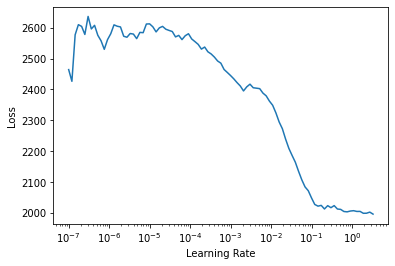

In [ ]:
learn2 = cnn_learner(dataLoader, fastai.vision.models.all.xse_resnext18_deeper, loss_func=MSELossFlat(), y_range=yearRange, metrics=mae)
learn2.lr_find()

In [ ]:
learn2.fine_tune(10,base_lr=0.05)

epoch,train_loss,valid_loss,mae,time
0,1239.443481,1409.311768,32.207619,06:26


epoch,train_loss,valid_loss,mae,time
0,797.918030,555.106567,17.123838,06:28
1,617.293335,527.643677,18.562073,06:21
2,561.430481,413.080475,14.708747,06:24
3,471.990784,343.654297,13.635862,06:22
4,402.748962,331.131592,13.145343,06:28
5,386.967529,310.700165,13.107221,06:24
6,355.108368,305.221313,13.279085,06:19
7,324.182739,289.824860,12.584779,06:17
8,319.385010,291.046967,12.773040,06:22
9,305.426392,290.726837,12.837651,06:21


Como se puede observar por los diferentes MAEs en todos los epochs, así como en el train_loss, el modelo es peor que el inicial. Por lo tanto, no merece la pena someterlo a validación.

## Interpretación de los resultados

Como estamos utilizando regresión, no hay disponible una clase Interpretación, como usábamos en clasificación.

### Evaluación en el conjunto de test

Tenemos que crear nuevos objetos DataBlock Y DataLoader. El primero lo construiremos con un splitter concreto que nos permite especificar la base de datos de test.

Previamente, creamos el dataset que relaciona las imágenes de test con su año.

In [ ]:
data = []

for image in testImages:
  imageName = image.name
  imageYear = getImageYearById(image.stem)
  if imageYear != -1:
    data.append((imageName, int(imageYear)))
  else:
    print('No data for image ' + str(imageName))

No data for image 42584.jpg
No data for image 30355.jpg
No data for image 34064.jpg
No data for image 32069.jpg
No data for image 33980.jpg
No data for image 35313.jpg
No data for image 35614.jpg
No data for image 42587.jpg
No data for image 38416.jpg
No data for image 28836.jpg
No data for image 32142.jpg
No data for image 35589.jpg


In [ ]:
testImagesDf = pd.DataFrame(data, columns=['path','year'])
testImagesDf.astype({'year': 'int32'})
testImagesDf.head()

,path,year
0,34569.jpg,1900
1,34005.jpg,1970
2,11841.jpg,1966
3,11034.jpg,1969
4,34649.jpg,1970


In [ ]:
X = ColReader('path', pref=testPath)
Y = ColReader('year')

In [ ]:
dataBlockTest = DataBlock(blocks=(ImageBlock, RegressionBlock()),
                                  get_x = X,
                                  get_y = Y,
                                  splitter=RandomSplitter(),
                                  item_tfms=Resize(460, method='squish'),
                                  batch_tfms=[*aug_transforms(size=224, max_warp=0)])

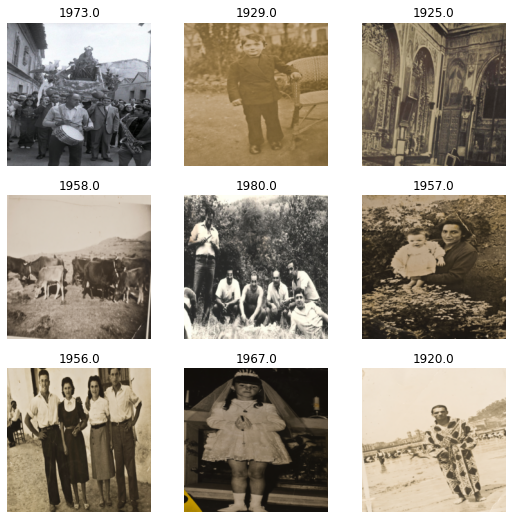

In [ ]:
dataLoaderTest = dataBlockTest.dataloaders(testImagesDf)
dataLoaderTest.show_batch()

Modificamos los learners:

In [ ]:
learn.dls = dataLoaderTest

Evaluamos el modelo mediante el método validate().

In [ ]:
learn.validate()

(#2) [224.43234252929688,11.561779975891113]

Conseguimos un MAE de test de 11.56, un valor bastante aceptable. En la aplicación probaremos el funcionamiento real.